In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flat_chess = cv2.imread('Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)


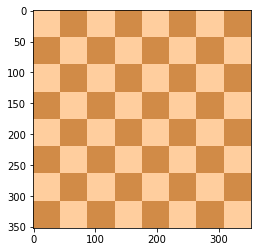

In [3]:
plt.imshow(flat_chess)

In [4]:
gray_flatchess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

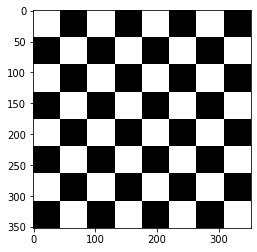

In [6]:
plt.imshow(gray_flatchess, cmap='gray')

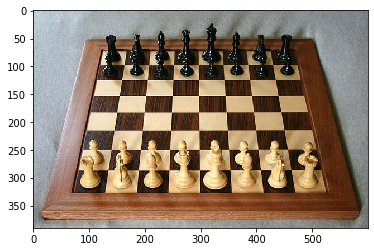

In [7]:
real_chess = cv2.imread('Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

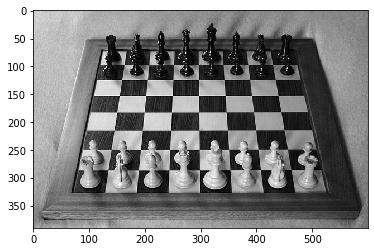

In [8]:
gray_realchess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_realchess, cmap='gray')

In [9]:
# applying Harris' edge detection to the images 
gray = np.float32(gray_flatchess) # Harris' detection algorithm requires floating point value pixels
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)


In [10]:
dst = cv2.dilate(dst, None) # visualization helper

In [11]:
# wherever the results of the Harris' corner algorithm
# are greater than 1% of the max value, that place will be colored red
flat_chess[dst>0.01*dst.max()] = [255,0,0] # RGB

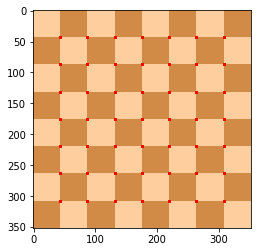

In [12]:
plt.imshow(flat_chess)

In [13]:
gray = np.float32(gray_realchess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)


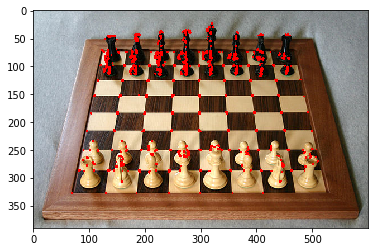

In [14]:
dst = cv2.dilate(dst,None)
real_chess[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(real_chess)

In [15]:
# RELOADING IMAGES TO USE THE SHI-TOMASI ALGORITHM
# PS: SHI-TOMASI ALGORITHM HAS BETTER PERFORMANCE THAN 
# HARRIS'
flat_chess = cv2.imread('Computer-Vision-with-Python/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_flatchess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_realchess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)


In [20]:
# applying shi-tomasi algorithm
corners = cv2.goodFeaturesToTrack(gray_flatchess, 64, 0.01, 10)



In [21]:
# turning the resulting float array into integers
# to make it easier for drawing on it
corners = np.int0(corners)


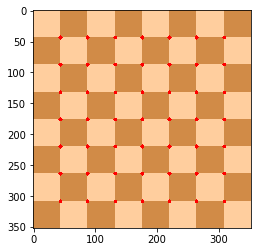

In [22]:
# flatting out the resulting array and drawing circles in the 
# places where corners are found
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)
    
plt.imshow(flat_chess)    

In [25]:
# applying on the real image 
corners = cv2.goodFeaturesToTrack(gray_realchess, 100, 0.01, 10)


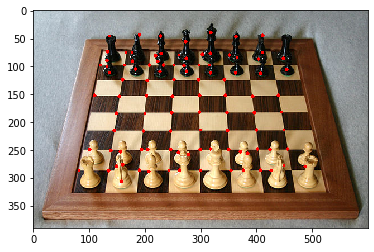

In [26]:
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
    
plt.imshow(real_chess)    